In [1]:
import pandas as pd
import requests
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, cross_validate

In [2]:
xgb = XGBRegressor()

In [3]:
def Energy_Parcer():
    url = 'https://ua.energy/wp-admin/admin-ajax.php' # название сервера который присылает данные на сайт
    payload = { # параметры ответа
        "Host": "ua.energy",
        "Connection": "keep-alive",
        "Content-Length": '75',
        "Origin": "https://ua.energy",
        "X-Requested-With": "XMLHttpRequest",
        "User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36",
        "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
        "Accept": "*/*",
        "Referer": "https://ua.energy/diyalnist/dyspetcherska-informatsiya/dobovyj-grafik-vyrobnytstva-spozhyvannya-e-e/",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7",
        "Cookie": "_ga=GA1.2.1756074011.1542635370; _gid=GA1.2.785433389.1542635370; _fbp=fb.1.1542635370134.1141896228; pll_language=uk"
    }

    headers = {}
    over = {'action':'get_data_oes', 'report_date': '27.11.2018', 'type':'consumption', 'rnd': '0.478195319721614'} # параметры запроса
    return requests.post(url, data=over, headers=payload).json()

In [4]:
data = Energy_Parcer()

In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()

,date,value
0,2014-01-01 01:00:00,20586
1,2014-01-01 02:00:00,19665
2,2014-01-01 03:00:00,19107
3,2014-01-01 04:00:00,18453
4,2014-01-01 05:00:00,18072


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear

    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    return X

In [9]:
X = create_features(df)
Y = df['value']

In [10]:
X.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,1,2,1,1,2014,1,1,1
1,2,2,1,1,2014,1,1,1
2,3,2,1,1,2014,1,1,1
3,4,2,1,1,2014,1,1,1
4,5,2,1,1,2014,1,1,1


In [11]:
cross_val_score(xgb, X, Y, cv=10)

/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.4986686 , 0.32506964, 0.10009111, 0.83992987, 0.84373111,
       0.92005911, 0.84135343, 0.82790874, 0.81881425, 0.72645498])

In [12]:
df = df[df.year > 2016].copy()

In [13]:
df = df.reset_index(drop=True)

In [14]:
X = create_features(df)
Y = df['value']

In [15]:
cross_validate(xgb, X, Y, cv=10)

/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'fit_time': array([0.67112088, 0.67693663, 0.69848514, 0.69194102, 0.67082214,
        0.67995572, 0.68204069, 0.68288994, 0.68929935, 0.69951367]),
 'score_time': array([0.0070343 , 0.00825381, 0.00804687, 0.00713754, 0.00789452,
        0.007339  , 0.00775218, 0.00788403, 0.00723362, 0.0081532 ]),
 'test_score': array([0.77632342, 0.81885384, 0.78326717, 0.78193782, 0.8873146 ,
        0.61135804, 0.81028018, 0.85517619, 0.80517788, 0.72381235])}

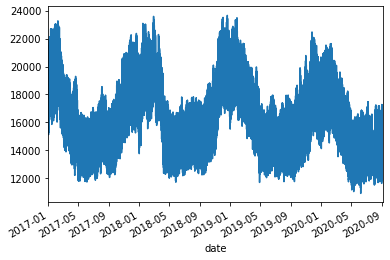

In [16]:
df.set_index('date')['value'].plot()

In [17]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [18]:
X

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,0,6,1,1,2017,1,1,52
1,1,6,1,1,2017,1,1,52
2,2,6,1,1,2017,1,1,52
3,3,6,1,1,2017,1,1,52
4,4,6,1,1,2017,1,1,52
5,5,6,1,1,2017,1,1,52
6,6,6,1,1,2017,1,1,52
7,7,6,1,1,2017,1,1,52
8,8,6,1,1,2017,1,1,52
9,9,6,1,1,2017,1,1,52


In [19]:
ls = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    ls.append(X_test)

In [20]:
ls[5]

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
16024,18,2,4,10,2018,304,31,44
16025,19,2,4,10,2018,304,31,44
16026,20,2,4,10,2018,304,31,44
16027,21,2,4,10,2018,304,31,44
16028,22,2,4,10,2018,304,31,44
16029,23,2,4,10,2018,304,31,44
16030,0,3,4,11,2018,305,1,44
16031,1,3,4,11,2018,305,1,44
16032,2,3,4,11,2018,305,1,44
16033,3,3,4,11,2018,305,1,44


In [21]:
df=df[(df.index < 16023)|(df.index > 19226)]

In [22]:
ls[0]

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,0,6,1,1,2017,1,1,52
1,1,6,1,1,2017,1,1,52
2,2,6,1,1,2017,1,1,52
3,3,6,1,1,2017,1,1,52
4,4,6,1,1,2017,1,1,52
5,5,6,1,1,2017,1,1,52
6,6,6,1,1,2017,1,1,52
7,7,6,1,1,2017,1,1,52
8,8,6,1,1,2017,1,1,52
9,9,6,1,1,2017,1,1,52


In [23]:
df=df[(df.index > 3000)]

In [24]:
X = create_features(df)
Y = df['value']
cross_validate(xgb, X, Y, cv=10)

/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'fit_time': array([0.54389286, 0.53571725, 0.54664207, 0.56292439, 0.53801942,
        0.54107976, 0.54119945, 0.55736828, 0.53877282, 0.56150365]),
 'score_time': array([0.00666523, 0.00667024, 0.00594735, 0.00644684, 0.00644517,
        0.00659537, 0.00667048, 0.00693893, 0.00648308, 0.00687313]),
 'test_score': array([0.81526371, 0.89646404, 0.61744024, 0.80279817, 0.90618634,
        0.67448933, 0.87215074, 0.8296171 , 0.76264302, 0.88674636])}

In [25]:
xgb.fit(X, Y)

/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/adanik/adanik/energy/myenv/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[20:14:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [26]:
import pickle

with open('prediction/XGB.pkl', 'wb') as f:
    pickle.dump(xgb, f)

In [27]:
with open('prediction/XGB.pkl', 'rb') as f:
    xgb = pickle.load(f)

In [28]:
cross_validate(xgb, X, Y, cv=10)

{'fit_time': array([0.27636266, 0.22599936, 0.21972537, 0.21113777, 0.21159506,
        0.21987653, 0.20528507, 0.21618056, 0.21386218, 0.21547294]),
 'score_time': array([0.00407839, 0.00425053, 0.00365853, 0.00399756, 0.0040133 ,
        0.00400543, 0.00399923, 0.00367332, 0.00388527, 0.00408435]),
 'test_score': array([0.83835669, 0.89634919, 0.70242087, 0.7975978 , 0.91051378,
        0.69032557, 0.84915485, 0.83310897, 0.78017977, 0.77716184])}